In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import functions as fn
import os
from sklearn import linear_model
import seaborn as sns


# Franke Function

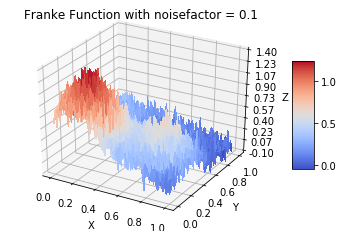

In [2]:
# Make data.
N = 70
noisefactor = 0.1
x,y,z = fn.init_data(N,noisefactor)

# Plot the surface.
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim((-0.10, 1.40))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Franke Function with noisefactor = {}".format(noisefactor))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


# OLS

The MSE for the prediciton is:
0.012858795072731669 

The R2 for the prediciton is:
0.85477008464907 



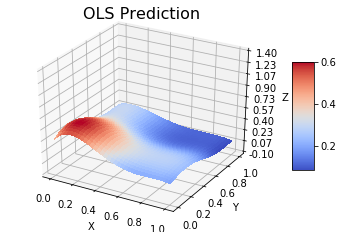

In [3]:
# Initializing the data
N = 70
noisefactor = 0.1
n = 5
test_size=0.2

# Intializing the dataset
x, y, z = fn.init_data(N,noisefactor)

# Creating the design matrix
X = fn.create_X(x, y, n)

# Splitting into testing and training
X_train, X_test, z_train, z_test = train_test_split(X, z.ravel(), test_size=test_size)

#Scaling the data
X_train, X_test = fn.Scaling(X_train, X_test)

# Inverting XTX matrix with SVD to avoid singular matrix
XTXinv = fn.SVDinv(X_train.T.dot(X_train))

# Estimating the Ordinary Least Squares Beta Matrix
OLSbeta = XTXinv.dot(X_train.T).dot(z_train)

# Making the prediciton
z_tilde = X_train @ OLSbeta
z_predict = X_test @ OLSbeta

#Computing variance
betavar_OLS = np.sqrt(np.diag(XTXinv)*np.var(z_train))


# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")
fn.surfplotter(x,y,OLSbeta, n, 'OLS Prediction',(-0.10, 1.40))

# RIDGE

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt


The MSE for the prediciton is:
0.011973225704388283 

The R2 for the prediciton is:
0.8710705403697631 



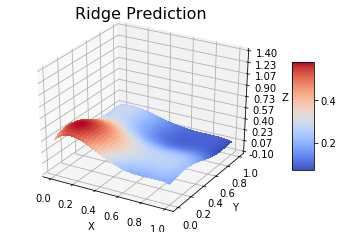

In [4]:
# Initializing the data parameters
N = 70
noisefactor = 0.1
n = 5
test_size=0.2

# Penalty Term
lamb = 1e-3

# Intializing the dataset
x, y, z = fn.init_data(N,noisefactor)

# Creating the design matrix
X = fn.create_X(x, y, n)

# Splitting into testing and training
X_train, X_test, z_train, z_test = train_test_split(X, z.ravel(), test_size=test_size)

#Scaling the data
X_train, X_test = fn.Scaling(X_train, X_test)

# Inverting XTX matrix with SVD to avoid singular matrix
XTXinv = fn.SVDinv(X_train.T.dot(X_train)+lamb*np.eye(len(X_train[0])))

# Estimating the Ordinary Least Squares Beta Matrix
RIDGEbeta = XTXinv.dot(X_train.T).dot(z_train) 



# Making the prediciton
z_tilde = X_train @ RIDGEbeta
z_predict = X_test @ RIDGEbeta

# Computing variance
betavar_RIDGE = np.diag(np.sqrt(np.var(z_train)*(XTXinv) @ X_train.T.dot(X_train) @ (XTXinv.T)))

# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")

fn.surfplotter(x,y,RIDGEbeta,n, 'Ridge Prediction',(-0.10, 1.40))


# LASSO

The MSE for the prediciton is:
0.02067445465977768 

The R2 for the prediciton is:
0.7695699924131283 



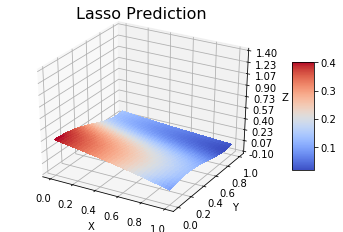

In [5]:
# Initializing the data parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n = 5
lamb = 1e-3


# Intializing the dataset
x, y, z = fn.init_data(N, noisefactor)

# Creating the design matrix
X = fn.create_X(x, y, n)

# Splitting into testing and training
X_train, X_test, z_train, z_test = train_test_split(X, z.ravel(), test_size=test_size)

#Scaling the data
X_train, X_test = fn.Scaling(X_train, X_test)

clf = linear_model.Lasso(alpha=lamb, fit_intercept=False, max_iter=100000, tol=0.01)
clf.fit(X_train, z_train)
LASSObeta = clf.coef_


# Making the prediciton
z_tilde = X_train @ LASSObeta
z_predict = X_test @ LASSObeta


# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")
fn.surfplotter(x,y,LASSObeta,n, 'Lasso Prediction',(-0.10, 1.40))


# COMPARING OLS AND RIDGE CONFIDENCE INTERVALS

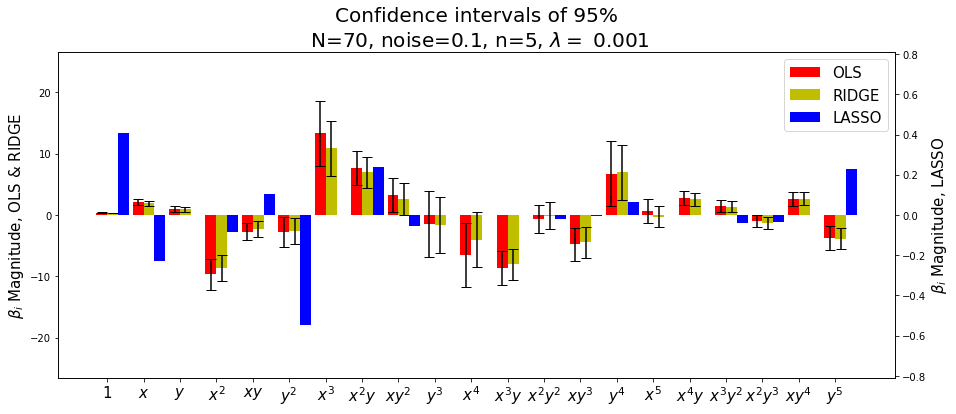

In [6]:
# Plotting the figure


labels= ['1','$x$','$y$','$x^2$','$xy$','$y^2$','$x^3$','$x^2y$','$xy^2$','$y^3$','$x^4$',
         '$x^3y$','$x^2y^2$','$xy^3$','$y^4$','$x^5$','$x^4y$','$x^3y^2$','$x^2y^3$','$xy^4$','$y^5$']

ind = np.arange(len(RIDGEbeta))
width = 0.3

fig, ax = plt.subplots(figsize=(15,6))
rects1 = ax.bar(ind, OLSbeta, width, color = 'r', yerr=2*betavar_OLS, capsize=5)
rects2 = ax.bar(ind+width, RIDGEbeta, width, color = 'y', yerr=2*betavar_RIDGE, capsize=5)
ax2 = ax.twinx()
rects3 = ax2.bar(ind+2*width, LASSObeta, width, color='b')



ax.set_ylabel(r"$\beta_i$ Magnitude, OLS & RIDGE", fontsize=15)
ax2.set_ylabel(r"$\beta_i$ Magnitude, LASSO", fontsize=15)

ax.set_ylim(-2*np.max(OLSbeta),2*np.max(OLSbeta))
ax2.set_ylim(-2*np.max(LASSObeta),2*np.max(LASSObeta))
ax.set_xticks(ind+width/2)
ax.set_xticklabels(labels, fontsize=15)
ax.set_title('Confidence intervals of 95%\n N={}, noise={}, n={}, $\lambda =$ {}'.format(N, noisefactor,n,lamb), fontsize=20)
ax.legend((rects1[0],rects2[0], rects3[0]), ('OLS', 'RIDGE', 'LASSO'), fontsize=15)
plt.show()

#fig.savefig('Results/betaconfidenceRIDGE.png')



# Train and Test error with Increasing Complexity
## Making a figure similar to that in Hasties et al

In [7]:
# Initializing the data parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n =  15
iterations = 100

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)

# Creating arrays for train and test error
TrainError = np.zeros(n)
TestError = np.zeros(n)

# Calculating Test and Training error over many iterations to get the expected value of train and test error.
for k in range(iterations):
    for i in range(n):
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

        # Estimating the Ordinary Least Squares Beta Matrix
        # Inverting XTX matrix with SVD to avoid singular matrix
        OLSbeta = fn.SVDinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)

        # Making the prediciton
        z_tilde = X_train @ OLSbeta
        z_predict = X_test @ OLSbeta
        
        # Computing the mean errors
        TrainError[i] += fn.MSE(z_train, z_tilde)/iterations
        TestError[i] += fn.MSE(z_test, z_predict)/iterations
    


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


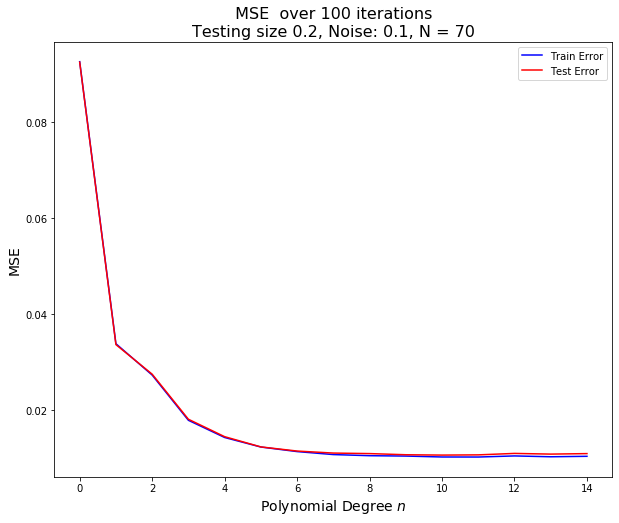

In [8]:
startpoint = 0
endpoint = 20
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(np.arange(n)[startpoint:endpoint],TrainError[startpoint:endpoint],'b' ,label='Train Error')
ax.plot(np.arange(n)[startpoint:endpoint],TestError[startpoint:endpoint],'r' ,label='Test Error')
ax.set_xlabel('Polynomial Degree $n$', fontsize=14)
ax.set_ylabel('MSE',fontsize=14)
ax.set_title(" MSE  over {0} iterations \nTesting size {1}, Noise: {2}, N = {3}".format(iterations, test_size, noisefactor, N), fontsize=16)


ax.legend()
#fig.savefig('Results/MSEiterations.png')
fig.show()

# OLS Bootstrapping 

In [9]:
# Data Parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)
z=z.ravel()


# Intializing error bias and variance
error = np.zeros(n)
bias = np.zeros(n)
variance = np.zeros(n)

# Bootstrap parameters
n_bootstraps = 100

for i in range(n):
    # Creating design matrix, splitting and scaling
    X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

    # Setting up the array for the bootstrapped predictions
    z_pred = np.empty((z_test.shape[0], n_bootstraps))
    
    for j in range(n_bootstraps):
        x_, z_  = fn.Shuffle_Data(X_train, z_train)
        OLSbeta = fn.SVDinv(x_.T.dot(x_)).dot(x_.T).dot(z_) 
        z_pred[:,j] = X_test @ OLSbeta 

    #Reshaping
    z_test = z_test.reshape(len(z_test),1)
    
    error[i], bias[i], variance[i] = fn.ErrBiasVar(z_test, z_pred)

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


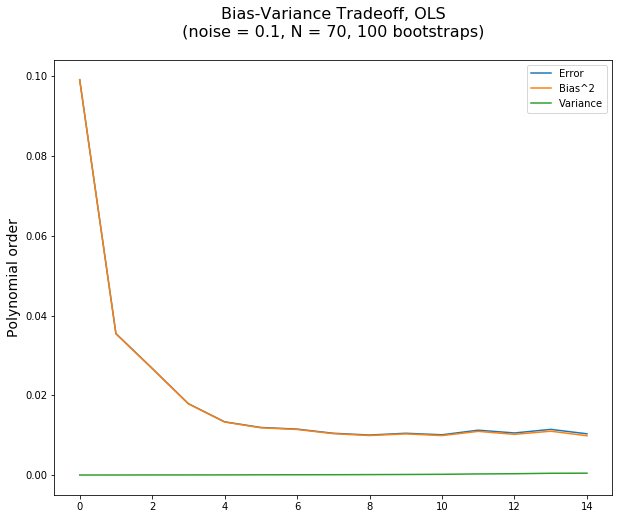

In [10]:
startpoint = 0
endpoint = 15

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(np.arange(n)[startpoint:endpoint], error[startpoint:endpoint], label='Error')
ax.plot(np.arange(n)[startpoint:endpoint], bias[startpoint:endpoint], label='Bias^2')
ax.plot(np.arange(n)[startpoint:endpoint], variance[startpoint:endpoint], label='Variance')



ax.set_ylabel("Error", fontsize=14)
ax.set_ylabel("Polynomial order",  fontsize=14)
ax.set_title("Bias-Variance Tradeoff, OLS\n (noise = {0}, N = {1}, {2} bootstraps) \n".format(noisefactor, N, n_bootstraps), fontsize =16)


#ax.set_yscale("log")
ax.legend()
plt.savefig("Results/BootstrapOLSBiasVariance.png", dpi=100)
fig.show()


# Ridge k fold cross validation

## NOTE:
### The k-fold cross validation resampling technique was not giving proper results for the error and the bias.
### The variance acted nicely,  with high variance at high $n$ and low $\lambda$. The bias and the error gave seemed to yield a "white noise" in the heatmaps.

In [11]:
# Data Parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)
z = z.ravel()

# penalty term
lamb = np.logspace(-5,2,8)

# CV fold parameters 
folds = 10


# Intializing error bias and variance
error_val = np.zeros((len(lamb),n))
bias_val = np.zeros((len(lamb),n))
variance_val = np.zeros((len(lamb),n))


for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))
    for i in range(n):
        # Creating design matrix
        X = fn.create_X(x,y,i)
        
        # Shuffle the data
        ind = np.random.permutation(len(X))
        X = X[ind,:]
        z = z[ind]
        
        # Test Train splitting of data
        X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

        #Split data into k folds
        folds_X = np.array_split(X_train,folds)
        folds_z = np.array_split(z_train,folds)
      

        # Setting up the array for the k fold predictions
        foldsize = np.int(len(X_train)/folds)  

       
        error_val_cur = np.empty((len(folds_X)))
        bias_val_cur  = np.empty((len(folds_X)))
        var_val_cur   = np.empty((len(folds_X)))
 
        for j in range(len(folds_X)):
                # Copy data frames
                tmp_X = folds_X.copy()
                tmp_z = folds_z.copy()
                
                # Save target fold from data frame
                cur_leaveout_X = tmp_X[j]
                cur_leaveout_z = tmp_z[j]
                
                # Remove leaveouts 
                tmp_X.pop(j)
                tmp_z.pop(j)
                
                cur_X_trainfold = np.concatenate(tmp_X)
                cur_z_trainfold = np.concatenate(tmp_z)
                
                # Fitting Ridge to the fold
                RIDGEbeta = fn.SVDinv(cur_X_trainfold.T.dot(cur_X_trainfold)+lamb[k]*np.eye(len(cur_X_trainfold[0]))).dot(cur_X_trainfold.T).dot(cur_z_trainfold) 
                
                z_val = cur_leaveout_X @ RIDGEbeta
                z_tilde = cur_X_trainfold @ RIDGEbeta
                z_pred = X_test @ RIDGEbeta

                # Computing the error
                error_val_cur[j] = fn.MSE(z_test,z_pred) #np.mean((z_test-z_pred)**2)
                bias_val_cur[j]  = np.mean((z_test - np.mean(z_pred))**2)
                var_val_cur[j]   = np.var(z_pred)
                
        #fn.surfplotter(x,y,RIDGEbeta,i, 'Ridge Prediction',(-0.10, 1.40))

        error_val[k,i] = np.mean(error_val_cur)
        bias_val[k,i]  = np.mean(bias_val_cur)
        variance_val[k,i] = np.mean(var_val_cur)

        

Lamdba equals 1e-05
Lamdba equals 0.0001
Lamdba equals 0.001
Lamdba equals 0.01
Lamdba equals 0.1
Lamdba equals 1.0
Lamdba equals 10.0
Lamdba equals 100.0


Text(0.5, 15.0, '$\\lambda$')

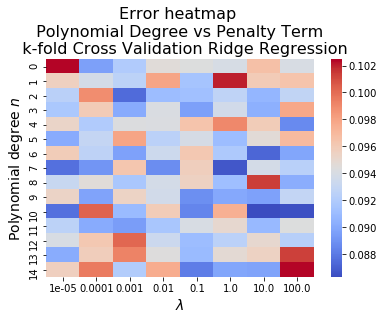

In [12]:
ax = sns.heatmap(error_val.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Error heatmap \n Polynomial Degree vs Penalty Term \n  k-fold Cross Validation Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

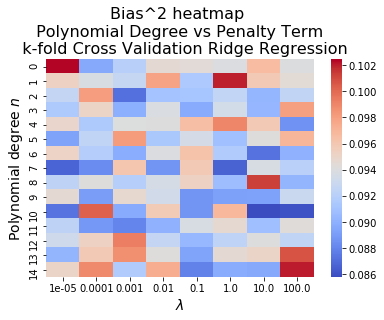

In [13]:
ax = sns.heatmap(bias_val.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Bias^2 heatmap \n Polynomial Degree vs Penalty Term \n  k-fold Cross Validation Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

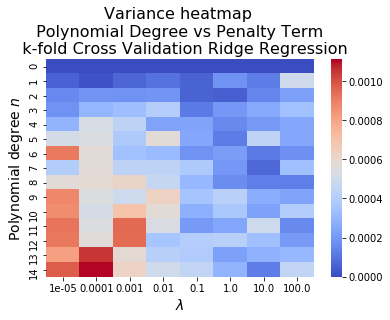

In [14]:
ax = sns.heatmap(variance_val.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Variance heatmap \n Polynomial Degree vs Penalty Term \n  k-fold Cross Validation Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

# RIDGE BOOTSTRAPPING

In [15]:
# Data Parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)


# Lambda
lamb = np.logspace(-5,2,8)

# Bootstrap parameters
n_bootstraps = 50


# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))



for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))
    for i in range(n):
            
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)
            RIDGEbeta = fn.SVDinv(x_.T.dot(x_)+lamb[k]*np.eye(len(X_train[0]))).dot(x_.T).dot(z_) 

            z_pred[:,j] = X_test @ RIDGEbeta 

        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i], bias[k,i], variance[k,i] = fn.ErrBiasVar(z_test, z_pred)

Lamdba equals 1e-05
Lamdba equals 0.0001
Lamdba equals 0.001
Lamdba equals 0.01
Lamdba equals 0.1
Lamdba equals 1.0
Lamdba equals 10.0
Lamdba equals 100.0


Text(0.5, 15.0, '$\\lambda$')

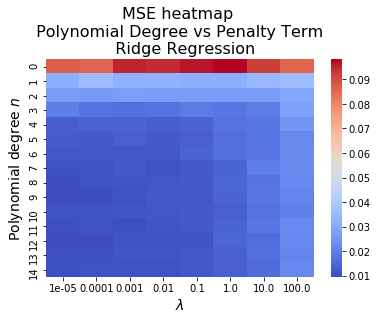

In [16]:
ax = sns.heatmap(error.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('MSE heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

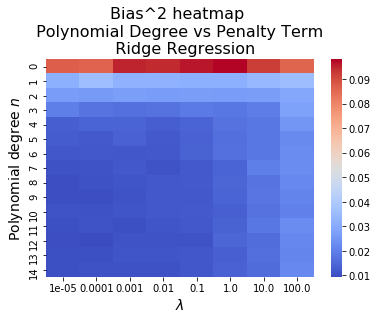

In [17]:
ax = sns.heatmap(bias.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Bias^2 heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

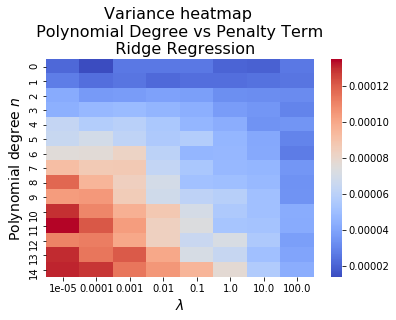

In [18]:
ax = sns.heatmap(variance.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Variance heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

# LASSO BOOTSTRAPPING

In [19]:
from sklearn import linear_model
# Data Parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)

# Lambda
lamb = np.logspace(-5,2,8)
# Bootstrap parameters
n_bootstraps = 50

# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))

for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))

    for i in range(n):
        print("n equals {}".format(i))
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)

            # Lasso regression
            clf = linear_model.Lasso(alpha=lamb[k], fit_intercept=False)
            clf.fit(x_, z_)
            LASSObeta = clf.coef_
            z_pred[:,j] = X_test @ LASSObeta 
            
        
        
        
        
        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i], bias[k,i], variance[k,i] = fn.ErrBiasVar(z_test, z_pred)

Lamdba equals 1e-05
n equals 0
n equals 1
n equals 2
n equals 3


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.53948106547091, tolerance: 0.10223344536069029
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.06152513056347, tolerance: 0.10240481336863773
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.623406373814138, tolerance: 0.10481562571323744
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.297980860408586, tolerance: 0.10189692090081606
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.370465415495428, tolerance: 0.10117233313761413
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.13996310273588, tolerance: 0.10374897562316472
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 4


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.4687286765418, tolerance: 0.10185380087470712
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.105719788326645, tolerance: 0.09810791253562658
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.10632227813309, tolerance: 0.09906129489212707
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.53175210008594, tolerance: 0.09908790462501435
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.82774336235209, tolerance: 0.09939416974591439
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.902129023445006, tolerance: 0.10302752683876121
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 5


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.70182975562042, tolerance: 0.09872860732443028
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.599135022658718, tolerance: 0.09927764763608435
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.51969410483738, tolerance: 0.0995966978957197
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.659098392082367, tolerance: 0.10098047281791836
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.81823040933184, tolerance: 0.10069598901814175
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.384315444215986, tolerance: 0.0971070732332481
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 6


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.005480211306864, tolerance: 0.10278507346849106
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.618476177742, tolerance: 0.10142785669264202
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.766718953663162, tolerance: 0.10180631356556764
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.897653078656276, tolerance: 0.10117273169010568
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.36505453679714, tolerance: 0.10218701821688501
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.871456845839305, tolerance: 0.09990512234450694
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 7


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.75850393335732, tolerance: 0.10424458518909528
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.520784649876813, tolerance: 0.09532103802023412
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.878655500456233, tolerance: 0.09923372288958231
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.98743528063852, tolerance: 0.09911518945765883
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.377474539386004, tolerance: 0.10011480960081542
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.072771934303333, tolerance: 0.10137640404338781
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 8


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.609203057964976, tolerance: 0.10305264555609474
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.574576687861413, tolerance: 0.10210405478872855
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.50279579207018, tolerance: 0.10434541581246504
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.562361729344506, tolerance: 0.10218487344415858
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.961069024175607, tolerance: 0.1025002538036249
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.26453802893885, tolerance: 0.10315288926515227
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 9


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.39484347571545, tolerance: 0.10217405482461159
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.195047076755667, tolerance: 0.10385870561794755
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.288897138606853, tolerance: 0.1013465203576406
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.215681005297217, tolerance: 0.10345817948987888
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.324651134762114, tolerance: 0.10165094159005297
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.875333027919147, tolerance: 0.09947000907499078
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 10


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.065738651799965, tolerance: 0.10374425492950339
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.011179861345727, tolerance: 0.10545357265355419
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.723631601758605, tolerance: 0.10010474351287087
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.46631246453297, tolerance: 0.10205866130943493
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.40661592040778, tolerance: 0.10208610195899681
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.16032745694004, tolerance: 0.10369415571303617
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 11


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.20943989114486, tolerance: 0.10451631500548714
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.61129266315278, tolerance: 0.10744098721278099
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.93516807848255, tolerance: 0.09968778365545507
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.42792686140649, tolerance: 0.10212891154052582
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.973779160875026, tolerance: 0.10479709469639406
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.87532877878762, tolerance: 0.10161766543572034
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 12


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.604918091370816, tolerance: 0.1025031081823479
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.22655029888764, tolerance: 0.10334339538879223
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.636694655991374, tolerance: 0.09998843811862806
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.257581196407575, tolerance: 0.09615286146506312
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.485022766653238, tolerance: 0.10307188413569286
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.740260797894457, tolerance: 0.09599877850358822
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 13


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.26109087348506, tolerance: 0.10051796487121144
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.239431436199965, tolerance: 0.09952039014286279
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.766300818727156, tolerance: 0.10172593308303346
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.18076430729463, tolerance: 0.10228893732010166
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.963263268527264, tolerance: 0.10504065745277008
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.672814349158415, tolerance: 0.10188985532039911
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 14


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.57283523904675, tolerance: 0.10083832080815576
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.563929316008448, tolerance: 0.09940925994716852
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.61144739157134, tolerance: 0.10324796902321473
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.234504738632314, tolerance: 0.10326369751659036
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.07211448364796, tolerance: 0.10315996932199752
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.772006752410416, tolerance: 0.10122081693250583
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

Lamdba equals 0.0001
n equals 0
n equals 1
n equals 2
n equals 3


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.51731922531869, tolerance: 0.10435116770154523
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.065812593724164, tolerance: 0.10468479808635321
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.669545004064911, tolerance: 0.10028772234530771
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.508944057672391, tolerance: 0.10277430374182277
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.749524027385032, tolerance: 0.10447502671641719
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.964365763762473, tolerance: 0.10006588754783527
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 4


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.181627866936541, tolerance: 0.09826553194341904
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.628592671152546, tolerance: 0.0988395255102588
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.273047983350793, tolerance: 0.09915619066573275
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.724654108696384, tolerance: 0.0995096347139769
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.551902298234769, tolerance: 0.1013134487674967
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.826384452861209, tolerance: 0.0985660666977519
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 5


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.443861837001393, tolerance: 0.10221593932385875
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.897199779233198, tolerance: 0.10178844060971824
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.622229718129113, tolerance: 0.10186760297538741
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.262412042463332, tolerance: 0.10476401371175398
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.237173134626282, tolerance: 0.10022892705314265
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.78022867994298, tolerance: 0.10562445425164065
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 6


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.268264882918224, tolerance: 0.10195046792819586
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.109054488268242, tolerance: 0.09954002900711802
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.91990300977338, tolerance: 0.10062507257307063
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.021780506976874, tolerance: 0.10320084348209625
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.15139452769554, tolerance: 0.10129828585405656
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.30967013233493, tolerance: 0.09747250296693712
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 7


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.18474057671787, tolerance: 0.09950282316006923
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.16693367344572, tolerance: 0.101877711963883
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.70683225085851, tolerance: 0.10282072113360058
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.820868577622853, tolerance: 0.0995872755327958
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.01938186093247, tolerance: 0.1010249786649387
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.406306280028033, tolerance: 0.10364149190190419
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 8


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.702550208806983, tolerance: 0.10314967374707622
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.295024203586465, tolerance: 0.10383375940178076
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.359371000704414, tolerance: 0.1018750711979624
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.758366432648227, tolerance: 0.10052927000015259
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.60192963220889, tolerance: 0.10457874680439032
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.73888005835971, tolerance: 0.10577382004783441
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 9


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.811696054972323, tolerance: 0.10541981102710281
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.41860521419352, tolerance: 0.09948154786075629
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.10807178408107, tolerance: 0.10379958035398652
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.75967847615207, tolerance: 0.1035437081966212
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.23646332562347, tolerance: 0.1048175748385913
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.447279310129257, tolerance: 0.1032949668288062
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

n equals 10


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.352614964158864, tolerance: 0.10808792419113607
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.060063642801993, tolerance: 0.10391096075191147
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.683427634216418, tolerance: 0.1031651349794881
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.588202253300672, tolerance: 0.10389257575592666
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.95853418416924, tolerance: 0.10119287981210484
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.77215283257285, tolerance: 0.09912778356515106
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 11


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.54381143092052, tolerance: 0.09967187501263314
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.375492340295402, tolerance: 0.09904192661741679
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.21069587903759, tolerance: 0.09861788617941873
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.005336713618092, tolerance: 0.10526346700925975
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.540278006052723, tolerance: 0.10135086439380855
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.972590745755745, tolerance: 0.10099299527118848
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 12


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.180822932047896, tolerance: 0.09739228476114914
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.044850448068487, tolerance: 0.10180490851176942
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.51811701322727, tolerance: 0.10049636408447983
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.700602528686687, tolerance: 0.09965210983336154
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.93605990512642, tolerance: 0.1038204810799135
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.003298546835264, tolerance: 0.10118146720511276
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 13


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.097077530455056, tolerance: 0.09960509431262499
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.577249346951604, tolerance: 0.10267755112488379
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.105027930550687, tolerance: 0.10242086696306688
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.299710720896407, tolerance: 0.10240402819948441
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.087114021031294, tolerance: 0.09951251336236962
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.17582982625857, tolerance: 0.09868758506222951
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 14


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.761711350245303, tolerance: 0.09674510283704561
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.520803506776176, tolerance: 0.10017574845594793
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.092711591855277, tolerance: 0.10074543336215643
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.675970013352977, tolerance: 0.09970646544350012
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.731986020658297, tolerance: 0.10215396369378967
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.474444369929483, tolerance: 0.09713672663058628
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

Lamdba equals 0.001
n equals 0
n equals 1
n equals 2
n equals 3


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.695325060135346, tolerance: 0.10354967131818225
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5676054135510356, tolerance: 0.10363312985997628
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6179213059014899, tolerance: 0.10067919435851864
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6431795743236961, tolerance: 0.1039370721703815
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5127331872111114, tolerance: 0.10257265826378625
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.44545790488969317, tolerance: 0.09906016041855717
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 4


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9563557249599057, tolerance: 0.09820210208090732
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.936038238071319, tolerance: 0.10249888101656371
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0050803731948577, tolerance: 0.09991791278668213
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0718629538361881, tolerance: 0.10342486904035077
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2989937851815228, tolerance: 0.09927849583199991
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2554206700752673, tolerance: 0.10138419314576834
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 5


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8385007480892881, tolerance: 0.10160583301701744
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.717387074998598, tolerance: 0.10010300875422296
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.099969864520702, tolerance: 0.09878858334246247
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8633292553902123, tolerance: 0.09929489942708607
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8301258459145089, tolerance: 0.10157267283615963
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7991415367653616, tolerance: 0.10202929549302989
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 6


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8597175700437703, tolerance: 0.09984060743683658
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8189829338407009, tolerance: 0.0992746877248504
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7594186649091057, tolerance: 0.09624900219221154
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9767265636990317, tolerance: 0.09999983534195515
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5056997294506687, tolerance: 0.09793149424022787
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2073866214515903, tolerance: 0.09973356499741294
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 7


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.889178502756721, tolerance: 0.10075859359396318
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3315783570456432, tolerance: 0.10301507838741009
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8718548080073418, tolerance: 0.10528951484981658
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4332617387186133, tolerance: 0.1035977369897003
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2391295018952633, tolerance: 0.09982217313780518
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7270277815049866, tolerance: 0.09992672308078208
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 8


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8510429190997542, tolerance: 0.09856829022558564
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7209111797111092, tolerance: 0.09918451534940421
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6828742478164145, tolerance: 0.09944410573873427
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0955391715111347, tolerance: 0.09840695570185413
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5790388589269782, tolerance: 0.09473115523056476
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6759848430611584, tolerance: 0.09858791044776893
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 9


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9209990968947608, tolerance: 0.10019522803173107
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7366078027637002, tolerance: 0.10454967320988781
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0082183457131464, tolerance: 0.10636170904664245
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7785825486385107, tolerance: 0.10410965527683502
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9399310962725593, tolerance: 0.10428425197690722
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8413579343865081, tolerance: 0.10409555357341078
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 10


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8692491932371524, tolerance: 0.1026578619221259
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0395665129952647, tolerance: 0.09897136779957212
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1946065849420933, tolerance: 0.1068666790218759
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5599079498531125, tolerance: 0.09905947041895462
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.10829574528006, tolerance: 0.10206572569526384
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5035255148517166, tolerance: 0.10384960305904167
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 11


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6437426991965651, tolerance: 0.09894859538804901
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.46802788059275713, tolerance: 0.10401525171466842
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1315057863631353, tolerance: 0.10169855242755088
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: 

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.024216081916279, tolerance: 0.09577194215492611
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1068254247693972, tolerance: 0.09600916504541315
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9390344872650616, tolerance: 0.0999805713077937
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 12


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5366890022485222, tolerance: 0.09914587670118022
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.979226331509409, tolerance: 0.09957013403149588
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.220072819834897, tolerance: 0.10333616913538927
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3295151496799775, tolerance: 0.10304962257836067
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2124915715012747, tolerance: 0.10371882781801338
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9394612593935818, tolerance: 0.10202325040808993
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 13


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3869115437116335, tolerance: 0.09838467877379926
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8724659210380992, tolerance: 0.10325511866365455
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0964373751121244, tolerance: 0.10157960708907932
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.139431605959743, tolerance: 0.09836893934433258
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1317282624243887, tolerance: 0.09892115777252872
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.02540825729794, tolerance: 0.1034126511217055
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 14


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7054535980913244, tolerance: 0.10442105819861684
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6412746179995779, tolerance: 0.10509351505270911
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4400913423084063, tolerance: 0.10202490658481074
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2004505718093554, tolerance: 0.10270215439975296
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1149947176697168, tolerance: 0.09652755524246329
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3606192416615386, tolerance: 0.10017651179046051
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

Lamdba equals 0.01
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 0.1
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 1.0
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 10.0
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 100.0
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14


Text(0.5, 15.0, '$\\lambda$')

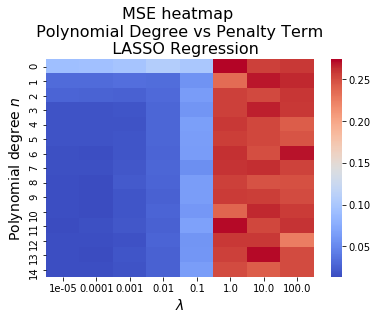

In [20]:
ax = sns.heatmap(error.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('MSE heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

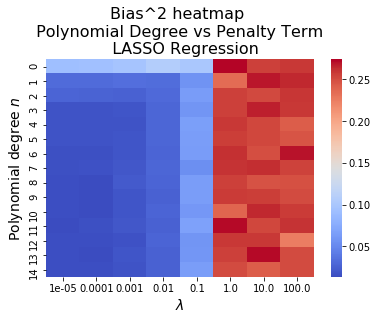

In [21]:
ax = sns.heatmap(bias.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Bias^2 heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

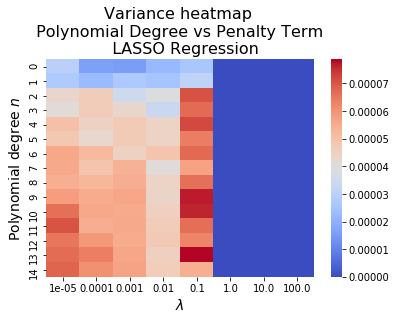

In [22]:
ax = sns.heatmap(variance.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Variance heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

# Terrain Data

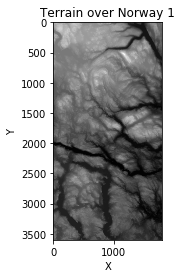

In [23]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Load the terrain
terrain1 = imread("SRTM_data_Norway.tif")
# Show the terrain
plt.figure()
plt.title("Terrain over Norway 1")
plt.imshow(terrain1, cmap="gray")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Creating a Subset of the Data

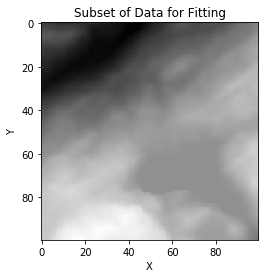

In [24]:
# Initializing the data
x_start, x_end = 800, 900
y_start, y_end = 500,600
Z =  np.array(terrain1[y_start:y_end,x_start:x_end])


plt.title("Subset of Data for Fitting")
plt.imshow(Z, cmap="gray")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



## Reducing the resolution of the data down to N x N datapoints.


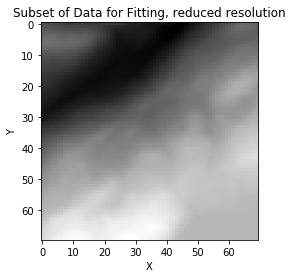

In [25]:
N = 70
x, y = np.linspace(0,1,N), np.linspace(0,1,N)
Z = fn.terrain_sampling(x,y,Z)

x, y = np.meshgrid(x,y)
plt.imshow(Z, cmap="gray")
plt.title("Subset of Data for Fitting, reduced resolution")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


# Normalizing the data points

In [26]:
Z = (Z-np.mean(Z))/np.sqrt(np.var(Z))

# Plotting the terrain

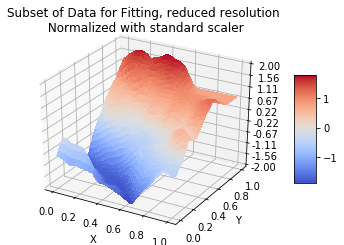

In [27]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, Z, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)


# Customize the z axis.
ax.set_zlim((-2, 2))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title("Subset of Data for Fitting, reduced resolution\n Normalized with standard scaler")
ax.set_xlabel("X")
ax.set_ylabel("Y")
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# OLS

The MSE for the prediciton is:
0.007298143453993884 

The R2 for the prediciton is:
0.9926126533468722 



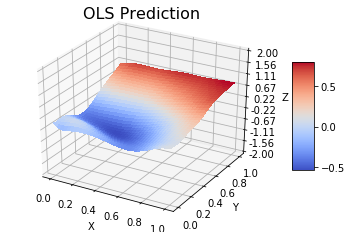

In [28]:
# Initializing the data
N = 70
test_size = 0.2
n =  10

# Creating design matrix, splitting and scaling
X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, n)

# Inverting XTX matrix with SVD to avoid singular matrix
XTXinv = fn.SVDinv(X_train.T.dot(X_train))

# Estimating the Ordinary Least Squares Beta Matrix
OLSbeta = XTXinv.dot(X_train.T).dot(z_train)

# Making the prediciton
z_tilde = X_train @ OLSbeta
z_predict = X_test @ OLSbeta

#Computing variance
betavar_OLS = np.sqrt(np.diag(XTXinv)*np.var(z_train))


# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")

fn.surfplotter(x,y,OLSbeta, n, 'OLS Prediction', (-2, 2))

# RIDGE

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


The MSE for the prediciton is:
0.016107458943530845 

The R2 for the prediciton is:
0.9844649784920355 



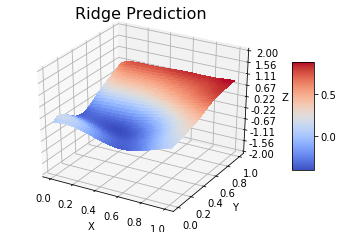

In [29]:
# Initializing the data
N = 70
test_size = 0.2
n =  10
lamb = 1e-4

# Creating design matrix, splitting and scaling
X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, n)


# Estimating the Ridge Beta Matrix
# Inverting XTX matrix with SVD to avoid singular matrix
RIDGEbeta = fn.SVDinv((X_train.T.dot(X_train)+lamb*np.eye(X_train[0].shape[0]))).dot(X_train.T).dot(z_train)

# Making the prediciton
z_tilde = X_train @ RIDGEbeta
z_predict = X_test @ RIDGEbeta

# Computing variance
betavar_RIDGE = np.diag(np.sqrt(np.var(z_train)*(XTXinv) @ X_train.T.dot(X_train) @ (XTXinv.T)))

# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")

fn.surfplotter(x,y,RIDGEbeta,n, 'Ridge Prediction',(-2, 2))


# LASSO

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.09048353924021, tolerance: 0.39377852836084776
  positive)


The MSE for the prediciton is:
0.03878676661561067 

The R2 for the prediciton is:
0.9604959287018683 



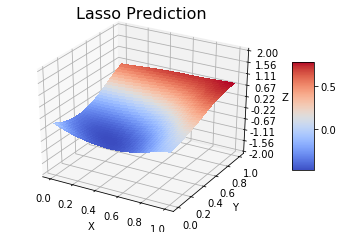

In [30]:
# Initializing the data
N = 70
test_size = 0.2
n =  10
lamb = 1e-4

# Creating design matrix, splitting and scaling
X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, n)

# Estimating the lasso coefficients
clf = linear_model.Lasso(alpha=lamb, fit_intercept=False)
clf.fit(X_train, z_train)
LASSObeta = clf.coef_


# Making the prediciton
z_tilde = X_train @ LASSObeta
z_predict = X_test @ LASSObeta


# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")

fn.surfplotter(x,y,LASSObeta,n, 'Lasso Prediction',(-2, 2))


# COMPARING OLS AND RIDGE CONFIDENCE INTERVALS FOR TERRAIN DATA

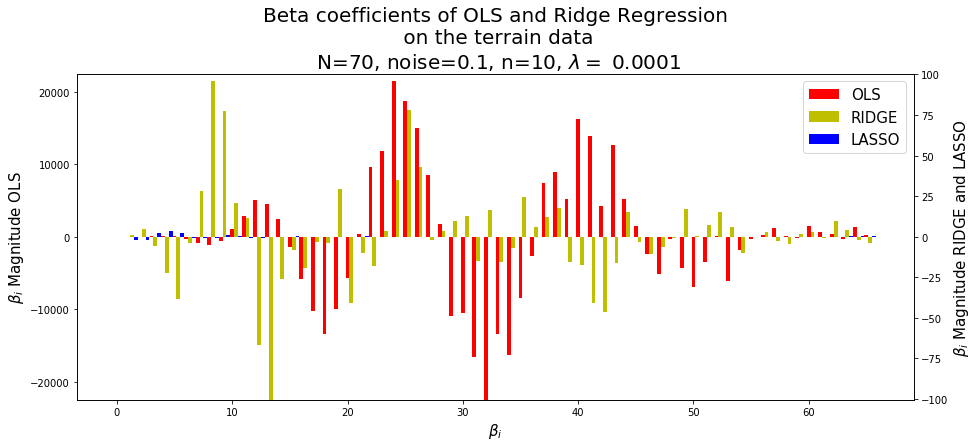

In [31]:
# Plotting the figure


#labels= ['1','$x$','$y$','$x^2$','$xy$','$y^2$','$x^3$','$x^2y$','$xy^2$','$y^3$','$x^4$',
#         '$x^3y$','$x^2y^2$','$xy^3$','$y^4$','$x^5$','$x^4y$','$x^3y^2$','$x^2y^3$','$xy^4$','$y^5$']

ind = np.arange(len(RIDGEbeta))
width = 0.33

fig, ax = plt.subplots(figsize=(15,6))

rects1 = ax.bar(ind, OLSbeta, width, color = 'r')#,yerr=2*betavar_OLS, capsize=3)
ax2 = ax.twinx()
rects2 = ax2.bar(ind+width, RIDGEbeta, width, color = 'y')#, yerr=2*betavar_RIDGE, capsize=5)

rects3 = ax2.bar(ind+2*width, LASSObeta, width, color = 'b')

ax.set_ylim(-1.05*np.max(OLSbeta),1.05*np.max(OLSbeta))
ax2.set_ylim(-1.05*np.max(RIDGEbeta),1.05*np.max(RIDGEbeta))

ax.set_ylabel(r'$\beta_i$ Magnitude OLS', fontsize=15)
ax2.set_ylabel(r'$\beta_i$ Magnitude RIDGE and LASSO', fontsize=15)


ax.set_xlabel(r"$\beta_i$", fontsize = 15)
#ax.set_xticks(ind+width/2)
#ax.set_xticklabels(labels, fontsize=15)
ax.set_title('Beta coefficients of OLS and Ridge Regression\n on the terrain data\n N={}, noise={}, n={}, $\lambda =$ {}'.format(N, noisefactor,n,lamb), fontsize=20)
ax.legend((rects1[0],rects2[0], rects3[0]), ('OLS', 'RIDGE', 'LASSO'), fontsize=15)
plt.show()

#fig.savefig('Results/betaconfidenceRIDGE.png')



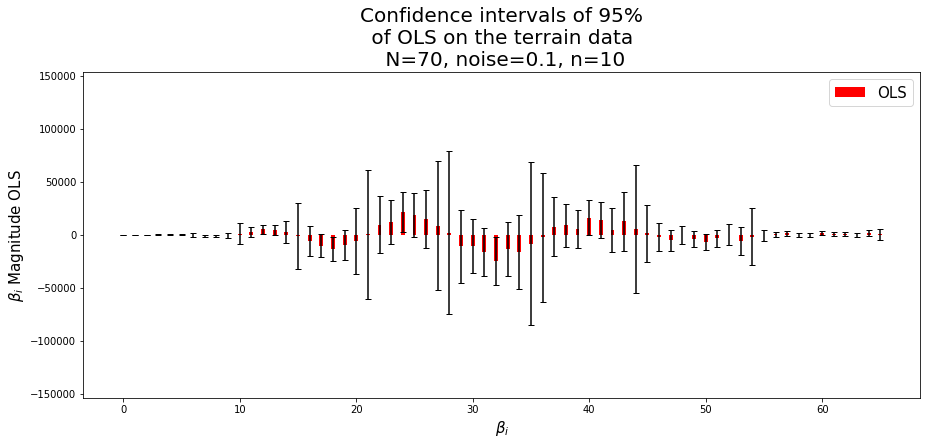

In [32]:
# Plotting the figure
ind = np.arange(len(OLSbeta))

fig, ax = plt.subplots(figsize=(15,6))

rects = ax.bar(ind, OLSbeta, width, color = 'r',yerr=2*betavar_OLS, capsize=3, label='OLS')

ax.set_ylim(-4*np.max(betavar_OLS),4*np.max(betavar_OLS))

ax.set_ylabel(r'$\beta_i$ Magnitude OLS', fontsize=15)

ax.set_xlabel(r"$\beta_i$", fontsize = 15)
#ax.set_xticks(ind+width/2)
#ax.set_xticklabels(labels, fontsize=15)
ax.set_title('Confidence intervals of 95%\n of OLS on the terrain data \n N={}, noise={}, n={}'.format(N, noisefactor,n,lamb), fontsize=20)
ax.legend(fontsize=15)
plt.show()

#fig.savefig('Results/betaconfidenceRIDGE.png')



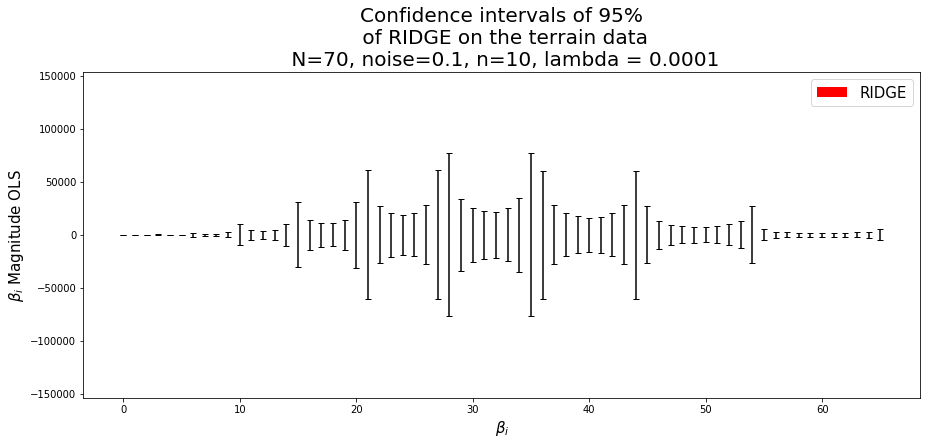

In [33]:
# Plotting the figure
ind = np.arange(len(RIDGEbeta))

fig, ax = plt.subplots(figsize=(15,6))

rects = ax.bar(ind, RIDGEbeta, width, color = 'r',yerr=2*betavar_RIDGE, capsize=3, label='RIDGE')

ax.set_ylim(-4*np.max(betavar_RIDGE),4*np.max(betavar_RIDGE))

ax.set_ylabel(r'$\beta_i$ Magnitude OLS', fontsize=15)

ax.set_xlabel(r"$\beta_i$", fontsize = 15)
#ax.set_xticks(ind+width/2)
#ax.set_xticklabels(labels, fontsize=15)
ax.set_title('Confidence intervals of 95%\n of RIDGE on the terrain data\n N={}, noise={}, n={}, lambda = {}'.format(N, noisefactor,n,lamb), fontsize=20)
ax.legend(fontsize=15)
plt.show()

#fig.savefig('Results/betaconfidenceRIDGE.png')






# RIDGE BOOTSTRAPPING

In [34]:
# Initializing the data
N = 70
test_size = 0.2
n =  15

# Lambda
lamb = np.logspace(-5,2,8)

# Bootstrap parameters
n_bootstraps = 50

# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))

for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))
    for i in range(n):
            
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)
            RIDGEbeta = fn.SVDinv(x_.T.dot(x_)+lamb[k]*np.eye(len(X_train[0])) ).dot(x_.T).dot(z_) 
            z_pred[:,j] = X_test @ RIDGEbeta 

        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i], bias[k,i], variance[k,i] = fn.ErrBiasVar(z_test, z_pred)

Lamdba equals 1e-05
Lamdba equals 0.0001
Lamdba equals 0.001
Lamdba equals 0.01
Lamdba equals 0.1
Lamdba equals 1.0
Lamdba equals 10.0
Lamdba equals 100.0


Text(0.5, 15.0, '$\\lambda$')

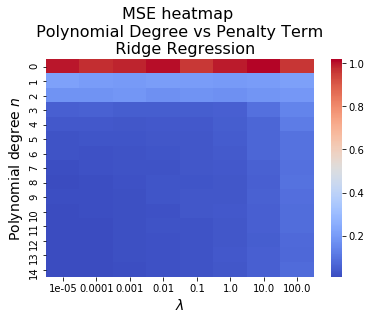

In [35]:
import seaborn as sns
ax = sns.heatmap(error.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('MSE heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

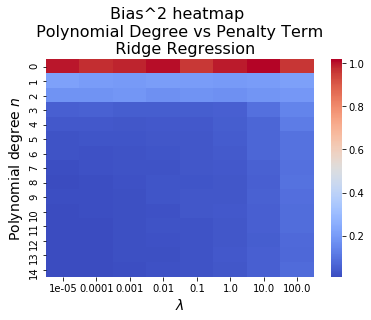

In [36]:
ax = sns.heatmap(bias.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Bias^2 heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

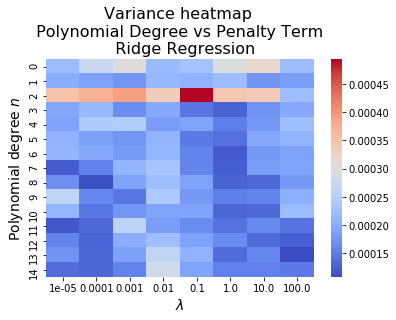

In [37]:
ax = sns.heatmap(variance.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Variance heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

# LASSO BOOTSTRAPPING

In [39]:
from sklearn import linear_model

from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
#@ignore_warnings(category=ConvergenceWarning)
# Removed warning so better display the notebook

# Initializing the data
N = 70
test_size = 0.2
n =  15

# Lambda
lamb = np.logspace(-5,2,8)

# Bootstrap parameters
n_bootstraps = 50

# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))

for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))

    for i in range(n):
        print("n equals {}".format(i))
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)

            # Lasso regression
            clf = linear_model.Lasso(alpha=lamb[k], fit_intercept=False)
            clf.fit(x_, z_)
            LASSObeta = clf.coef_
            z_pred[:,j] = X_test @ LASSObeta 
            
        
        
        
        
        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i], bias[k,i], variance[k,i] = fn.ErrBiasVar(z_test, z_pred)

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


Lamdba equals 1e-05
n equals 0
n equals 1
n equals 2
n equals 3


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.5771008605099, tolerance: 0.3902342970290718
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101.9373019103069, tolerance: 0.39439997981845937
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.99721352884656, tolerance: 0.3935766732895588
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103.20601730546355, tolerance: 0.4026681200387181
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.72697177315843, tolerance: 0.3843522277324976
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103.20031910383605, tolerance: 0.3929407857279795
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 4


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.05819263022518, tolerance: 0.386224806700316
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.38747170574649, tolerance: 0.4019996175467289
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.68608498075562, tolerance: 0.39961661792733943
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114.41968565331003, tolerance: 0.39822189720713397
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.98123807972793, tolerance: 0.39738006531570347
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.79194096215127, tolerance: 0.3960824195229275
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 5


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105.71863210598117, tolerance: 0.393749875246354
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.53213416842355, tolerance: 0.4021412661960353
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104.63228291894303, tolerance: 0.38486556014702095
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.22417100031328, tolerance: 0.3933890834994652
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.77085502040664, tolerance: 0.3901670965823694
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.50068400543486, tolerance: 0.3955868599909228
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 6


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97.46276345452576, tolerance: 0.3802393926414717
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.5163569736183, tolerance: 0.3907948609664204
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95.21487988587091, tolerance: 0.39442307019273054
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.04800258567887, tolerance: 0.38771559985876386
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96.19215443491042, tolerance: 0.39419046617122877
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97.4484804148954, tolerance: 0.3833288521182249
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

n equals 7


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.77097279370281, tolerance: 0.3899689179443357
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.34197025037862, tolerance: 0.3922017117336568
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.40209614557756, tolerance: 0.3979668765521872
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.43503695633224, tolerance: 0.39646376485161955
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.68756920206326, tolerance: 0.38779624986139777
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83.91769918635326, tolerance: 0.3942265669768327
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 8


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.85719959307409, tolerance: 0.39654687446558523
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.0490377238538, tolerance: 0.3976895898896351
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.2752347702387, tolerance: 0.3916821547687015
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objectiv

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.20336461852166, tolerance: 0.3996332028695485
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.84784472970125, tolerance: 0.3986964799450346
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.00559368212149, tolerance: 0.39072626234376423
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

n equals 9


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.59926692099178, tolerance: 0.38940650138561844
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.0554254536509, tolerance: 0.4057148210506374
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.80655235868453, tolerance: 0.4081412746739481
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.12794836691877, tolerance: 0.40400982969622823
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.42865401743371, tolerance: 0.39485451671102156
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.20238966923829, tolerance: 0.3961931600557641
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 10


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.33313162399247, tolerance: 0.38883916688818526
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.15845692872523, tolerance: 0.39429045247209826
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.53409779493771, tolerance: 0.3944743022807301
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.47209856512556, tolerance: 0.3992757339797532
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.22880681920645, tolerance: 0.39224994992931955
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.02663106381654, tolerance: 0.39796803748631215
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 11


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77.64392430743948, tolerance: 0.3967328570126177
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77.98271440881811, tolerance: 0.3864701218778852
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.86579106625342, tolerance: 0.38840098593346684
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.11857736525668, tolerance: 0.39198465343561223
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.88497092257111, tolerance: 0.39593148624261804
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.6248050707722, tolerance: 0.39602583946023323
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 12


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.77844459435723, tolerance: 0.3900817843341893
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.73627432798425, tolerance: 0.3987046012182808
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.16099587742984, tolerance: 0.3906861192807461
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.37367063981871, tolerance: 0.38794336975882104
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.511030060611, tolerance: 0.38380949861011954
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.11605263549805, tolerance: 0.3826258391559749
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

n equals 13


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.88667536962721, tolerance: 0.3925523435577532
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.22343813636869, tolerance: 0.3887161962180892
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.79772319010989, tolerance: 0.39118015035215403
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.63621163276787, tolerance: 0.3850778491702017
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.64464719312151, tolerance: 0.3954971241960894
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.54425316392789, tolerance: 0.3983775970790006
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

n equals 14


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.24347556914857, tolerance: 0.3897129250667484
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.85814462381944, tolerance: 0.38390189546626313
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.53150956686422, tolerance: 0.38756345274279186
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.24337689576785, tolerance: 0.39397494170039465
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.05633004282475, tolerance: 0.3892352285388618
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.0910279820965, tolerance: 0.38553545859330135
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

Lamdba equals 0.0001
n equals 0
n equals 1
n equals 2
n equals 3


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.61677214219573, tolerance: 0.38856900583337034
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105.410970941383, tolerance: 0.3938276268015849
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.30485108228257, tolerance: 0.4009175959687825
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.11645620413306, tolerance: 0.39818686124153396
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.86992065077655, tolerance: 0.39071175363182276
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105.53582481920381, tolerance: 0.4008304184040188
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 4


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.12897388254429, tolerance: 0.39311819394128333
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89.3764276968714, tolerance: 0.3828234011383705
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.6361582760242, tolerance: 0.38827715539338226
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.05601431501297, tolerance: 0.3872786830877763
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90.93592425012682, tolerance: 0.38855098484595846
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.63563850839795, tolerance: 0.3875354813180599
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

n equals 5


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104.02825547381838, tolerance: 0.39253438712839434
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.71862116682517, tolerance: 0.3971367015802099
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.14226698559159, tolerance: 0.39520259450312506
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.38491757479689, tolerance: 0.38781284288238
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103.41514031512374, tolerance: 0.39634742037681736
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.01155734943414, tolerance: 0.39009661355702807
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 6


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.44020717029117, tolerance: 0.38351190398932017
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.75228998069716, tolerance: 0.3826942627433554
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.11719793512596, tolerance: 0.3793882298824883
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.92835917322093, tolerance: 0.39770552832802464
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90.22141829477506, tolerance: 0.385894245203126
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.50932401514994, tolerance: 0.39765290092049466
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

n equals 7


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.0922692670643, tolerance: 0.3932130803146458
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.12779695398477, tolerance: 0.3869975994451328
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.92913129299654, tolerance: 0.39537571454693127
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.21124618074991, tolerance: 0.3767549730259054
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83.2378689819932, tolerance: 0.3852703839917539
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.61427468211838, tolerance: 0.3948099690143352
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objectiv

n equals 8


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.52208516626243, tolerance: 0.4007085487264364
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.04176139175456, tolerance: 0.3977145129047379
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.78186444585155, tolerance: 0.3874651273655458
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.59005210802076, tolerance: 0.39862398744028854
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.98705224083885, tolerance: 0.3952194331909424
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.70411920117186, tolerance: 0.39223555765269574
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 9


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.36121586431274, tolerance: 0.38519634606098746
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.32138455710341, tolerance: 0.3919032434656754
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.9368957255358, tolerance: 0.38675896678344734
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.48724455729197, tolerance: 0.37703565865913496
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.32705690450116, tolerance: 0.3877836872681976
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.68227130466542, tolerance: 0.39511409963669714
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 10


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.51659338389932, tolerance: 0.39475124436918185
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.74190448471111, tolerance: 0.3926468811300858
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.05609678531829, tolerance: 0.3894667449988101
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.44224129568158, tolerance: 0.38665343965602744
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.5795414410133, tolerance: 0.3888312685025193
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.09122704044047, tolerance: 0.39101819800038257
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

n equals 11


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.30412640422514, tolerance: 0.38836915168664254
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.98653247098127, tolerance: 0.3929909905422702
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.53305886363133, tolerance: 0.39389361807234563
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.53084470310926, tolerance: 0.385991892223104
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.39772293777473, tolerance: 0.38469165236512914
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.15137815618706, tolerance: 0.3896970645452404
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

n equals 12


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.16543655106501, tolerance: 0.39572893521387675
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.099641166187176, tolerance: 0.39936225065759573
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.71269394196311, tolerance: 0.39305840754337157
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.3587895269019, tolerance: 0.387219770813117
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.584997553947744, tolerance: 0.389452376280466
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.2214230989113, tolerance: 0.3905388848090082
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective 

n equals 13


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.29164880073103, tolerance: 0.3904097310210451
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.0954486359207, tolerance: 0.3978939868459045
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.8686618238974, tolerance: 0.39573432215422555
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objectiv

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.22500321235495, tolerance: 0.3877656265505335
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.79520385252712, tolerance: 0.400451064680446
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.04662872935478, tolerance: 0.3903571767119855
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objectiv

n equals 14


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.86455225827547, tolerance: 0.39545114085813915
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.04566894090044, tolerance: 0.38161720632166857
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.67776005769325, tolerance: 0.38667401112654254
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.90128393163006, tolerance: 0.38837602972326235
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.52021549995035, tolerance: 0.401978341232111
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.10998174621007, tolerance: 0.38448836397522324
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

Lamdba equals 0.001
n equals 0
n equals 1
n equals 2
n equals 3


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.54137772349642, tolerance: 0.39896837313208755
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.40182658775564, tolerance: 0.4015967208500467
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.835061097917006, tolerance: 0.39027648963355355
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.18559201989835, tolerance: 0.3841923461866749
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.34099526672865, tolerance: 0.3961337766876468
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.087017063582266, tolerance: 0.39982439684558346
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 4


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.868299028413418, tolerance: 0.39359610879801377
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.299708064811284, tolerance: 0.39239368522474044
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.114482837395173, tolerance: 0.39164345532473593
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.599925707406015, tolerance: 0.40836674094070025
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.848971777211489, tolerance: 0.39144505091384607
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.695661775708288, tolerance: 0.3937206474281367
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 5


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.10799529991928, tolerance: 0.38564206966125314
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.988550579319394, tolerance: 0.3942669075802802
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.631328978550414, tolerance: 0.388312213979547
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.50625669606484, tolerance: 0.3830818922034313
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.963709960818704, tolerance: 0.3937222369844554
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.725566902533302, tolerance: 0.39597687860388775
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 6


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.23006572703336, tolerance: 0.4019879134241584
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.08327598249048, tolerance: 0.38977055815424094
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.272875448508174, tolerance: 0.39183890503976504
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.482605302335585, tolerance: 0.39637763637325213
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.642913280117284, tolerance: 0.39770299019390326
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.1651169411312, tolerance: 0.3949212709497723
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 7


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.79967487937628, tolerance: 0.384088518977385
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.60828471273945, tolerance: 0.3996783961756189
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.51278769163761, tolerance: 0.3875370194443318
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objectiv

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.897412005391686, tolerance: 0.39227468649787955
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.200207714167675, tolerance: 0.39400093079617
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.60886392184612, tolerance: 0.39465418003071573
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 8


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.17053043160534, tolerance: 0.3879495661778109
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.36205694861059, tolerance: 0.38230394544660684
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.90759126385166, tolerance: 0.383034069314413
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.50759650190277, tolerance: 0.3900437456040283
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.980773992402504, tolerance: 0.3893606818159404
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.55737610945542, tolerance: 0.38419640392359544
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 9


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.352189726949405, tolerance: 0.393242902716139
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.829934363085854, tolerance: 0.38773617875886507
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.11645558767961, tolerance: 0.39083665557591457
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.176673098989212, tolerance: 0.39495744983094805
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.96436110632318, tolerance: 0.39130325348527667
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.15165491481332, tolerance: 0.3962294141416618
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 10


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.134376839759312, tolerance: 0.3817326255749781
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.293032293389928, tolerance: 0.395273000419462
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.776497137564576, tolerance: 0.3889915910916493
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.857633494636673, tolerance: 0.3910281863069515
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.547741052842582, tolerance: 0.38663852638509527
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.782928825767556, tolerance: 0.3886598096275849
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 11


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.271522567212685, tolerance: 0.3913020155719848
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.94199458590961, tolerance: 0.40445223478174097
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.762383362011605, tolerance: 0.39551149956499515
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.042973549768732, tolerance: 0.39810965118049846
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.9519396945835, tolerance: 0.3871646369950766
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.792697883565467, tolerance: 0.39044152350349765
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 12


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.195058713470473, tolerance: 0.402656237851332
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.78438237753727, tolerance: 0.3900217239360309
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.900239440331717, tolerance: 0.39013825461212737
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.772401189893685, tolerance: 0.39273447671365347
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.544958553970417, tolerance: 0.3919125574832158
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.13992172657663, tolerance: 0.4020334681254888
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 13


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.33486613711443, tolerance: 0.39375368251245485
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.15798931432974, tolerance: 0.3881294744251651
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.224706281104744, tolerance: 0.39453192301924095
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.982793495796045, tolerance: 0.39635301209963864
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.842711119351293, tolerance: 0.38418941128380824
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.481999928162224, tolerance: 0.3930425605393822
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 14


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.853821458344868, tolerance: 0.3911690128545338
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.71511980990185, tolerance: 0.3958311182629974
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.76968947761668, tolerance: 0.3942152228645897
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.709069057468554, tolerance: 0.3838982089056887
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.287675849313715, tolerance: 0.3911409952221048
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.375806786796872, tolerance: 0.3959859679594032
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

Lamdba equals 0.01
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6333722459484648, tolerance: 0.3942024558351503
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.42741993698308534, tolerance: 0.39252031218886446
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.45035368877097426, tolerance: 0.40125833400795546
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: 

n equals 8


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7909387448922303, tolerance: 0.4049510781330533
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5075928901759426, tolerance: 0.4070841783327671
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7648355271260243, tolerance: 0.3933725797200733
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 9


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4853554672791347, tolerance: 0.38747396538465867
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4780113309759031, tolerance: 0.3859289583928867
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5046617560769278, tolerance: 0.3894183421692923
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 10


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5196402093694701, tolerance: 0.39411918111125877
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6640237473135926, tolerance: 0.40165405386882314
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5826352988480039, tolerance: 0.3910325800054232
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 11


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6621356972749481, tolerance: 0.4027324843599817
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7332943593093546, tolerance: 0.39867139710006133
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4962995966916992, tolerance: 0.4104935556818032
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 12


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5000611243192452, tolerance: 0.3842730954139544
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.566165171190562, tolerance: 0.3914890432958644
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5838498966167549, tolerance: 0.38723605714367443
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 13


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5842380950382449, tolerance: 0.3947683979993138
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.41556511875273827, tolerance: 0.39837928280157214
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5551721893571653, tolerance: 0.39692257887749827
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 14


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6571257756077671, tolerance: 0.39490655041528483
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7100322168053026, tolerance: 0.3901252806506847
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5371540418250333, tolerance: 0.40284093588786324
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

Lamdba equals 0.1
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 1.0
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 10.0
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 100.0
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14


In [ ]:
import seaborn as sns
ax = sns.heatmap(error.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('MSE heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

In [ ]:
ax = sns.heatmap(bias.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Bias^2 heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

In [ ]:
ax = sns.heatmap(variance.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Variance heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)